# Ford used car Machine Learning price prediction


    goal of this notebook to use machine learning teacniques to predict price of Ford used car dataset
    

#### Importing of required libraries and packages

In [1]:
# import the data analysis librariess
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


# generate clear images
sns.set_context('talk')

# for desired color palette 
plot_color = sns.color_palette("colorblind")

# set the background of the images
sns.set_style('darkgrid')

#### Reading CSV file

In [2]:
df = pd.read_csv("ford.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### Given Feature variables:
**model**: categories of the ford car
<br>**year**: the year car was made
<br>**transmission**: the type of trasmission the car has
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders

### Target Variable:
**price**: selling price of the car

#### Check for missing values and data type

In [3]:
#check of missing values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

Number of observations (rows) = 17964
<br>Number of columns = 8 (7 feature variables and 1 target variable)
<br>Number of categorical variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 4: year, mileage, mpg, engineSize
#### The dataset has no missing values

In [4]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


#### Performing Label or One hot encoding 

In [5]:
#figureing out how many unique models 
display(df['model'].unique())
display(df['model'].nunique())


array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo'], dtype=object)

23

#### Observations:
- There are 23 unique car models in dataset

#### Performing One hot encoding

In [6]:
df_one = pd.get_dummies(df, drop_first=True)

# df_one.info()

#### Performing Label encoding

In [7]:
 LE = LabelEncoder()

df_le = df.copy()

 df_le['transmission'] = LE.fit_transform(df_le['transmission'])
 df_le['fuelType'] = LE.fit_transform(df_le['fuelType'])
 df_le['model'] = LE.fit_transform(df_le['model'])
 df_le['year'] = LE.fit_transform(df_le['year'])

# df_le.info()

#### Separating the features and target variable

In [8]:
# Create feature and target lists
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

# Create feature and target dataframes

X = df[features]
y = df[target]

# Create feature and target dataframes for one hot encoding 

# X = df_one.drop('price', axis=1)
# y = df_one[target]

# Create feature and target dataframes for label encoding 

# X = df_le.drop('price', axis=1)
# y = df_le[target]

# display the dataframe shapes
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (17964, 4)
Shape of y:  (17964, 1)


#### Split the Data into Train Set and Test Set

In [9]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (14371, 4)
y_train shape:  (14371, 1)
X_test shape:  (3593, 4)
y_test shape:  (3593, 1)


### Perform Linear Regression


In [10]:
# Create a model instance
model = LinearRegression()

# Fit data to model
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [11]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)


,features,coefficients
2,mpg,-86.475914
0,mileage,-0.052436
1,year,1300.778943
3,engineSize,5337.924753


In [12]:
model.intercept_

array([-2612187.52421052])

#### Prediction

In [13]:
# Predict from the test set features
y_pred = model.predict(X_test)

In [14]:
df_predict = pd.DataFrame()

df_predict['original_price'] = y_test['price']
df_predict['predicted_price'] = y_pred
df_predict['observation'] = np.arange(0, y_test.shape[0] , 1)


display(df_predict)

,original_price,predicted_price,observation
1949,14000,12485.674201,0
5830,8500,11179.972122,1
4425,8950,9765.458071,2
14737,15999,16346.919062,3
8862,13495,14292.950610,4
...,...,...,...
13097,16199,13818.545537,3588
16846,14750,14357.241986,3589
2334,15300,13200.613169,3590
11012,13994,12486.789554,3591


#### prediction visualization

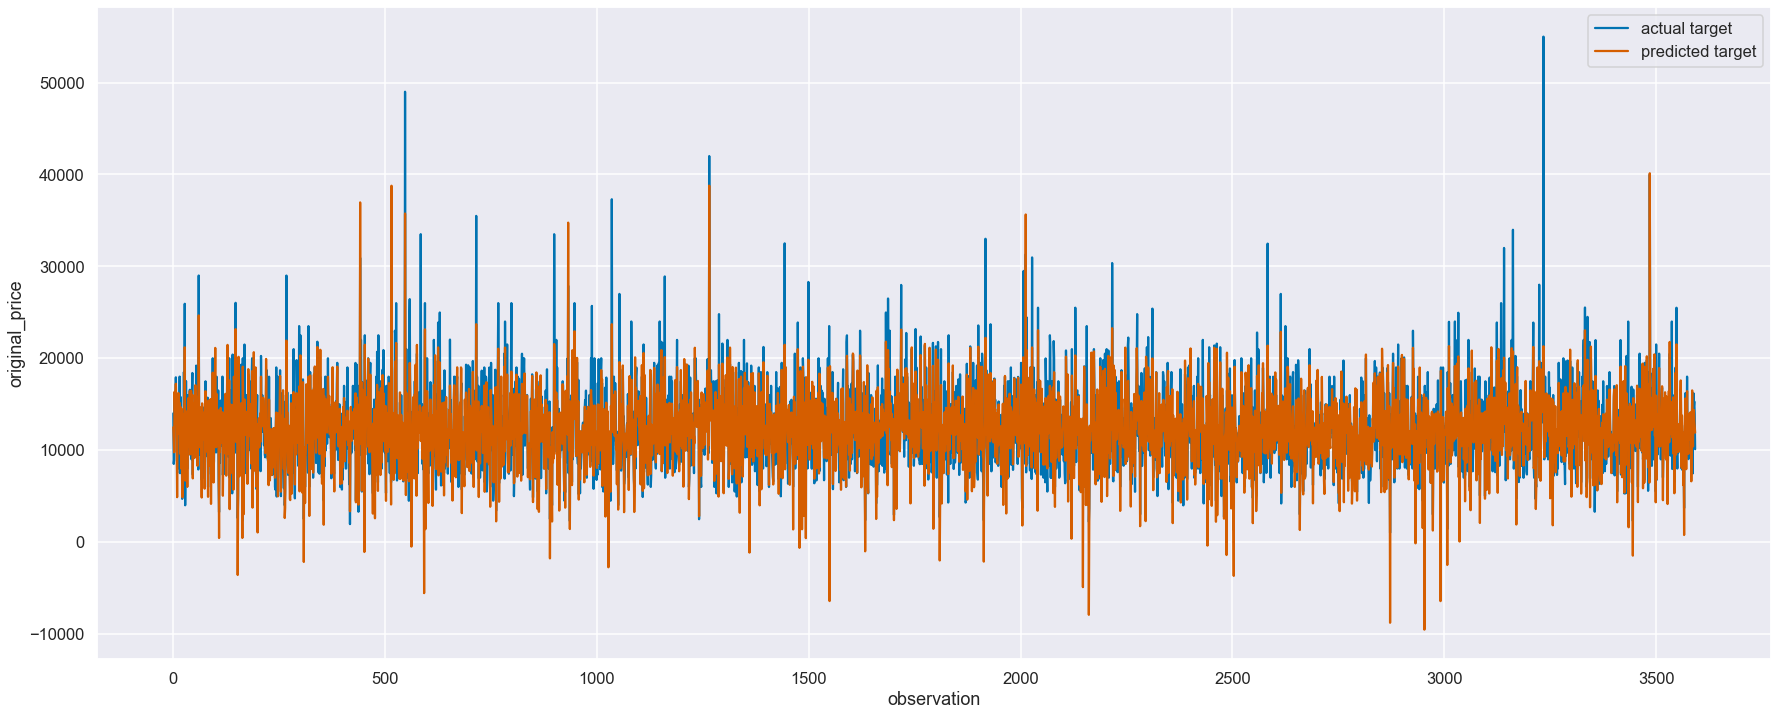

In [15]:
# y_test['pred'] = y_pred
# y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='observation', y='original_price', data=df_predict, label='actual target', color= plot_color[0])
sns.lineplot(x='observation', y='predicted_price', data=df_predict, label='predicted target', color= plot_color[3])

# sns.lineplot(data=df_predict)
plt.show()

#### Prediction Error


In [16]:
#Prediction error
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1773.7870373636313
mean squared error =  6239134.42861867
root mean squared error =  2497.8259404167197
coefficient of determination =  0.7211063186170403


#### Comparing Prediction Error matrics


one hot encoding

- mean absolute error =  1348.6142794578525
- mean squared error =  3571684.7211971837
- root mean squared error =  1889.890134689629
- coefficient of determination =  0.8403431899039093


label encoding

- mean absolute error =  1745.7839910543416
- mean squared error =  6069926.141160233
- root mean squared error =  2463.722009716241
- coefficient of determination =  0.728670047648639



#### Observations:
- looking error matrices one hot encoding is working better with our dataset